In [15]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
ab=pd.read_csv("abalone.txt.csv",names=['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings'])
df=pd.DataFrame(data=ab)
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [3]:
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object

In [6]:
df.keys()

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [7]:
df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

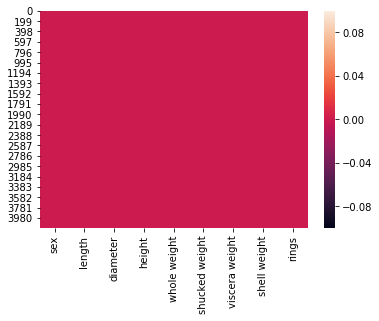

In [9]:
import seaborn as sns
sns.heatmap(df.isnull())

In [1]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
df1=pd.get_dummies(df)
df1

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,1,0,0


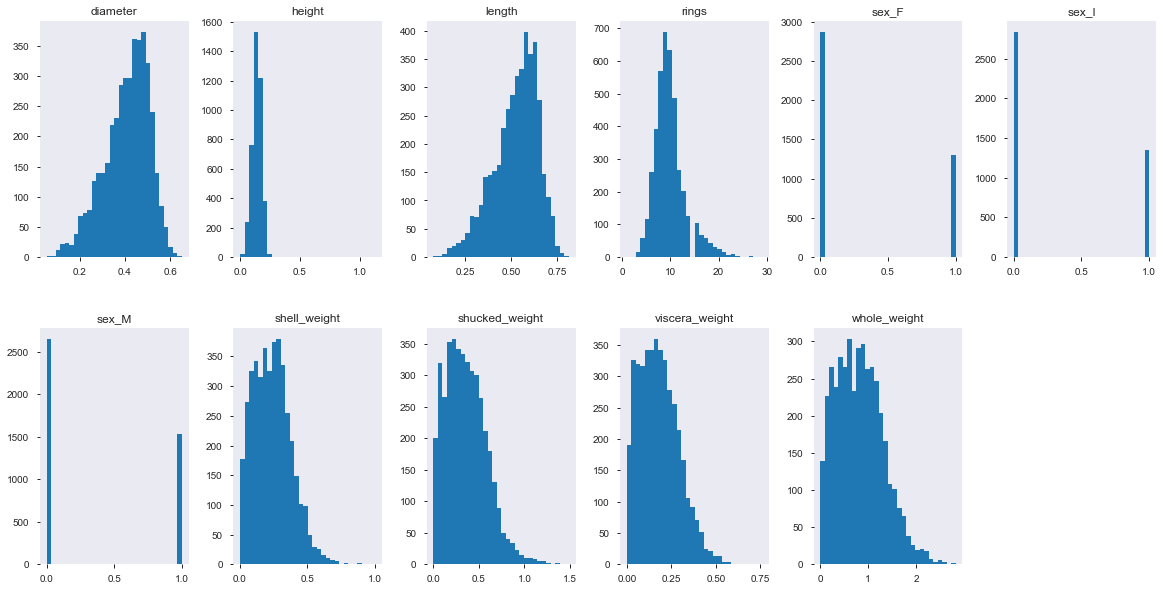

In [43]:
df1.hist(figsize=(20,10),grid=False,layout=(2,6),bins=30)
plt.show()

In [45]:
import scipy.stats as stats
stats.skew(df1)

array([-0.63964346, -0.60897935,  3.12769368,  0.53076787,  0.71883966,
        0.59163959,  0.62070382,  1.11370177,  0.80701245,  0.76543271,
        0.55718954])

In [46]:
df1.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [48]:
df1['age']=df['rings']+1.5
df1

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0,8.5
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1,0,9.5
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1,0,0,21.5
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1,0,0,17.5
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,0,0,1,10.5
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,1,0,0,20.5


In [51]:
df1=df1.drop("rings",axis=1)

In [52]:
df1

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0,8.5
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0,1,0,9.5
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,1,0,0,21.5
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,1,0,0,17.5
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,0,0,1,10.5
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,1,0,0,20.5


In [53]:
df1.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,0.312904,0.321283,0.365813,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.463731,0.467025,0.481715,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000,0.000000,0.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000,0.000000,0.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.000000,1.000000,1.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000,30.500000


In [56]:
df1[df1.height==0]

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
1257,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,0,1,0,9.5
3996,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,0,1,0,7.5


In [62]:
df1=df1[df1.height > 0]
df1

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0,8.5
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0,1,0,9.5
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,1,0,0,21.5
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,1,0,0,17.5
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,0,0,1,10.5
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,1,0,0,20.5


In [63]:
df1.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,0.313054,0.320958,0.365988,11.435090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,0.463792,0.466901,0.481764,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,2.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,0.000000,0.000000,0.000000,9.500000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,0.000000,0.000000,0.000000,10.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,1.000000,1.000000,1.000000,12.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000,30.500000


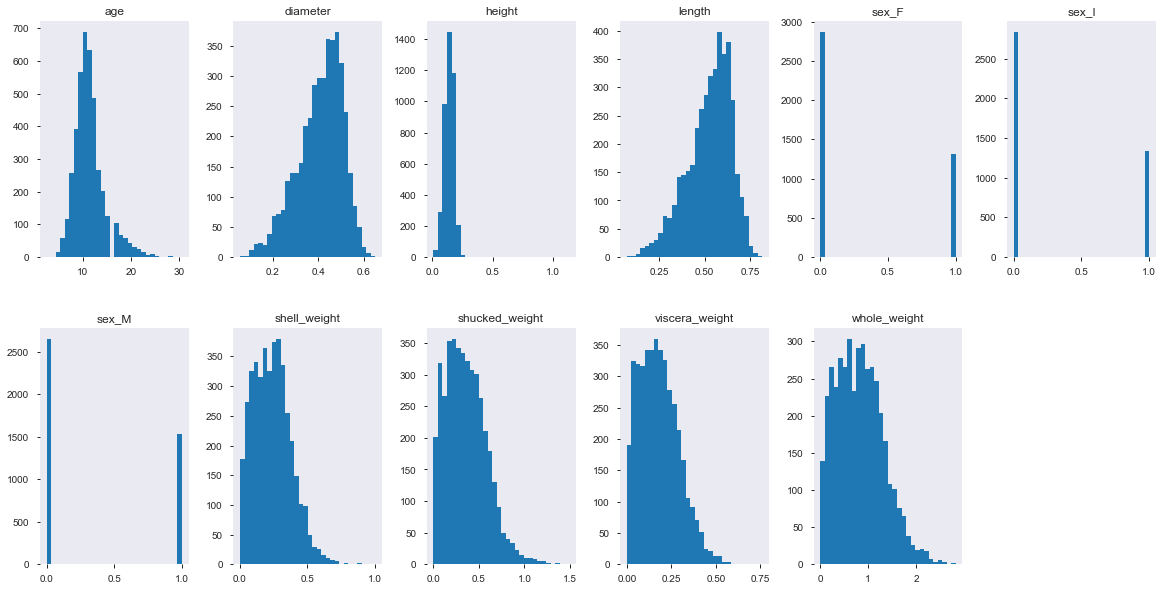

In [64]:
df1.hist(figsize=(20,10),grid=False,layout=(2,6),bins=30)
plt.show()

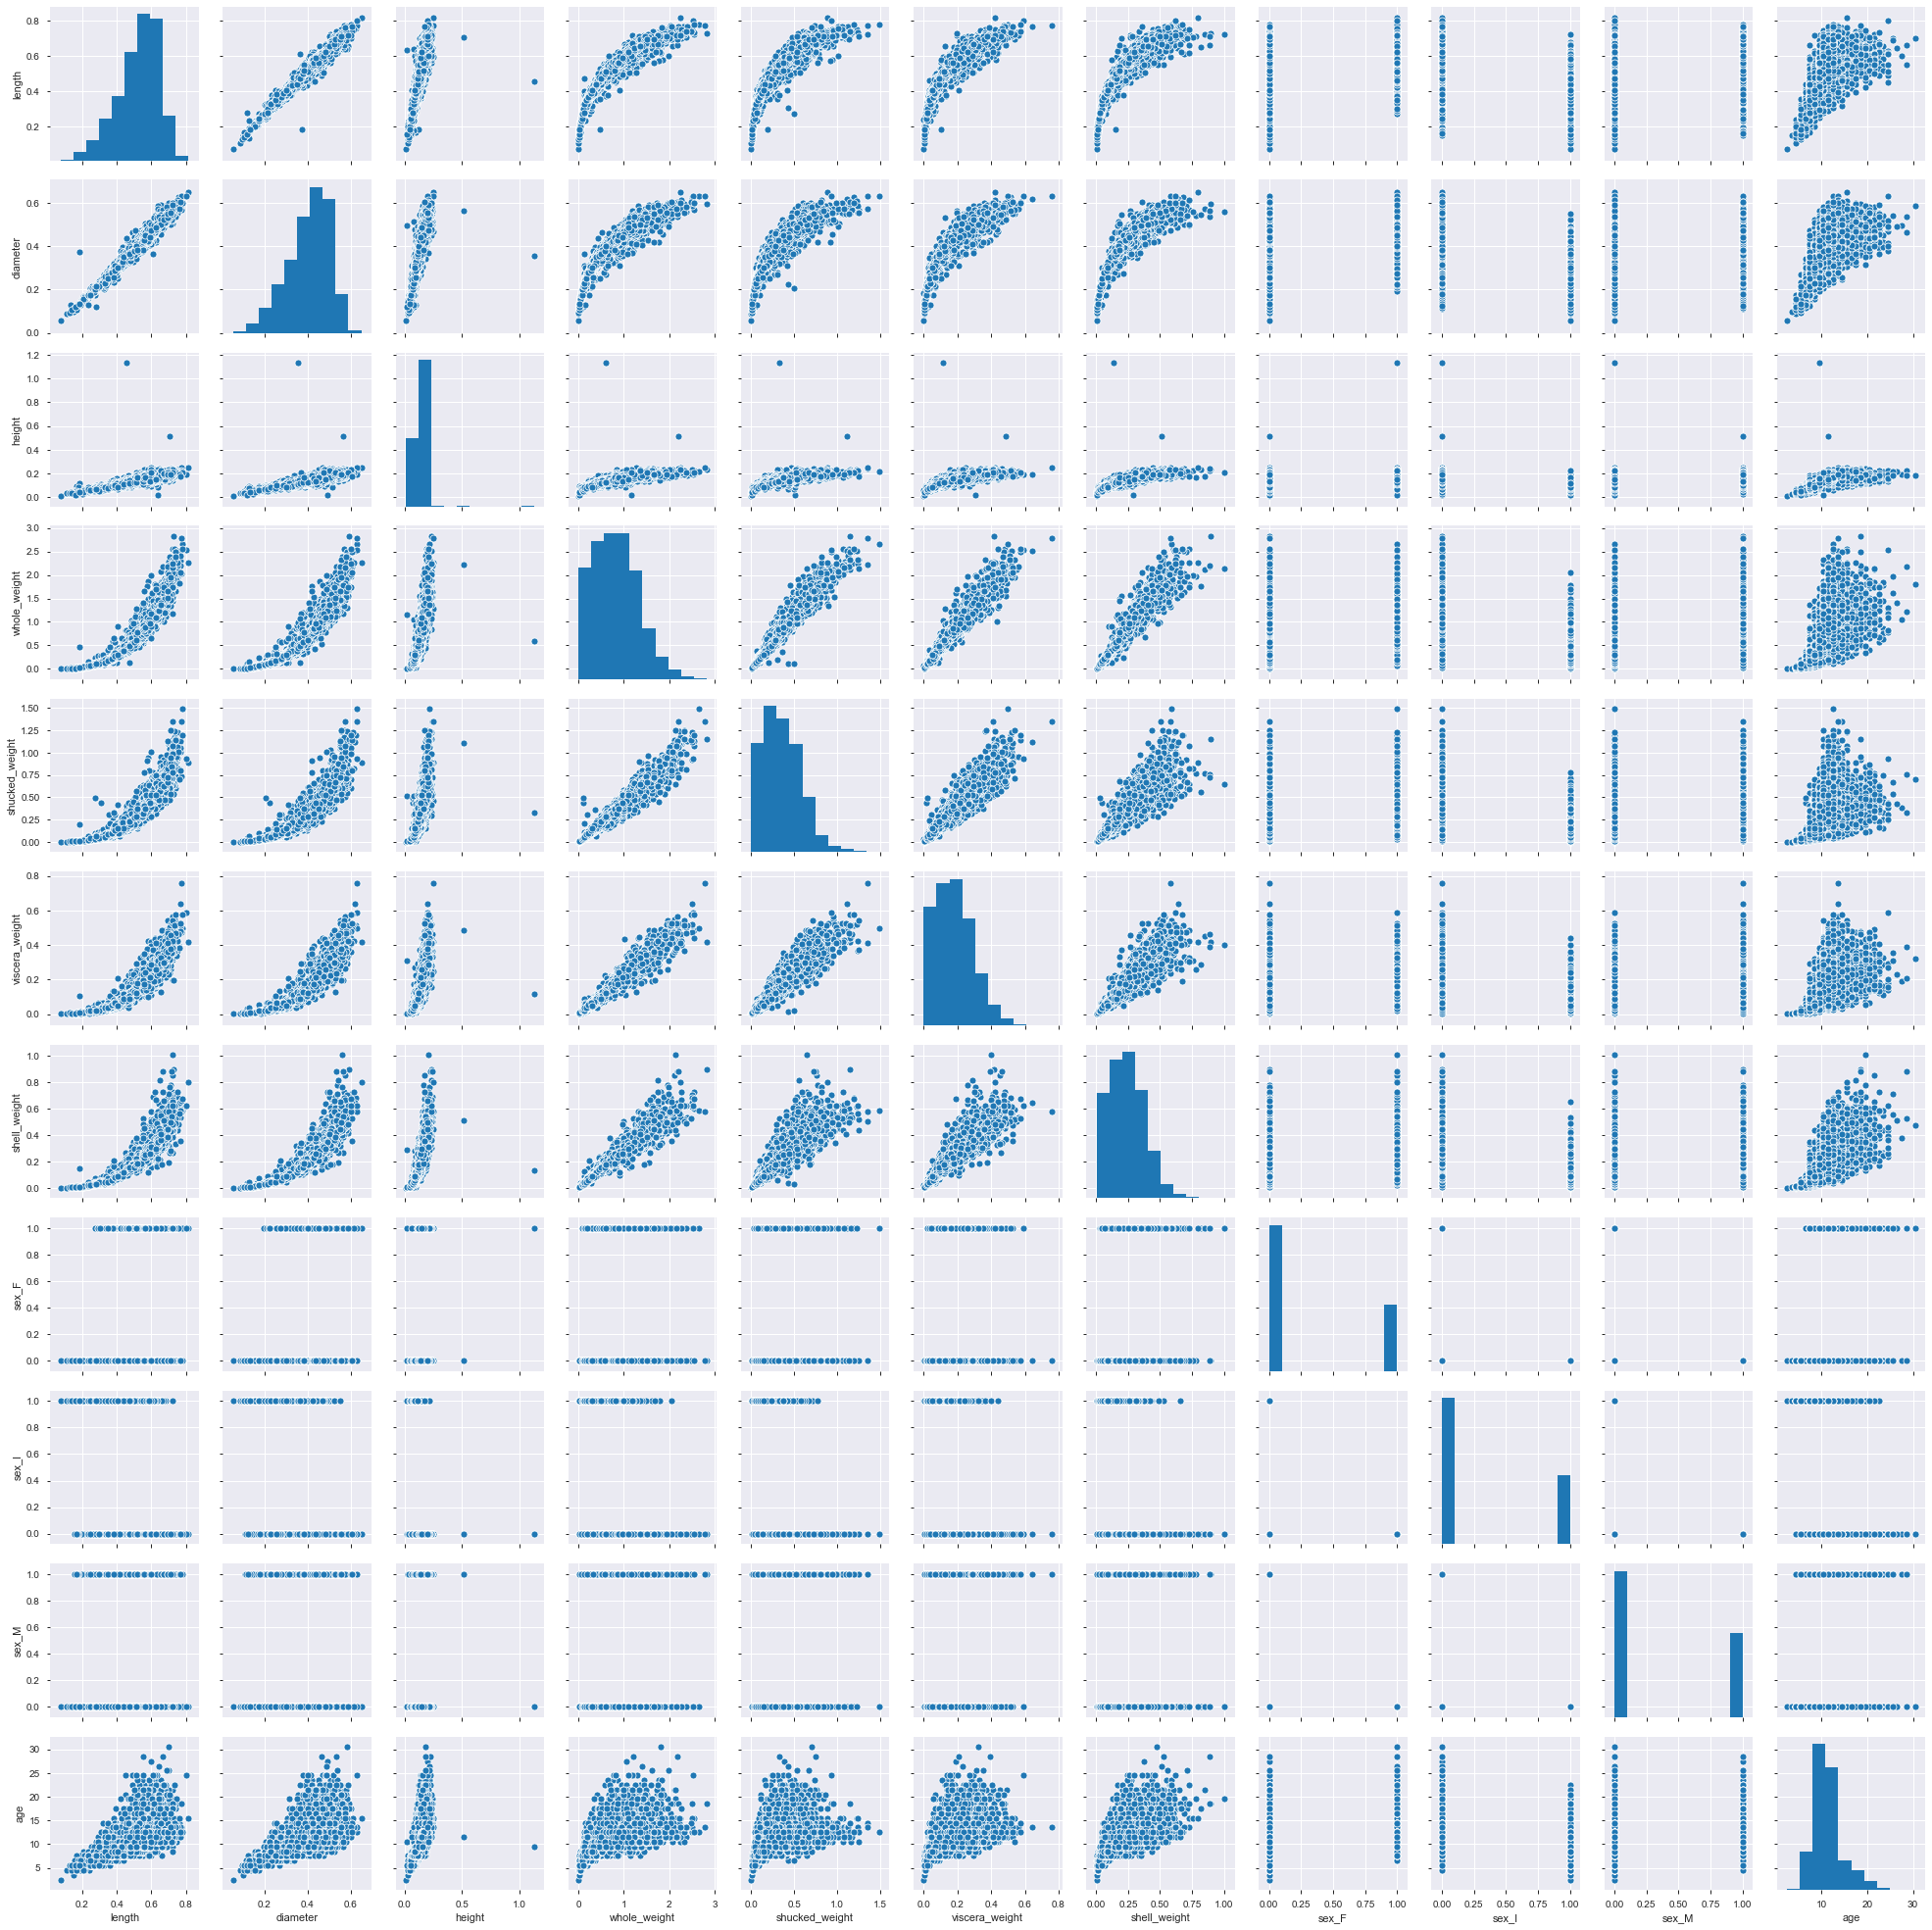

In [66]:
sns.pairplot(df1,height=2.5)
plt.show()

In [67]:
df1.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5


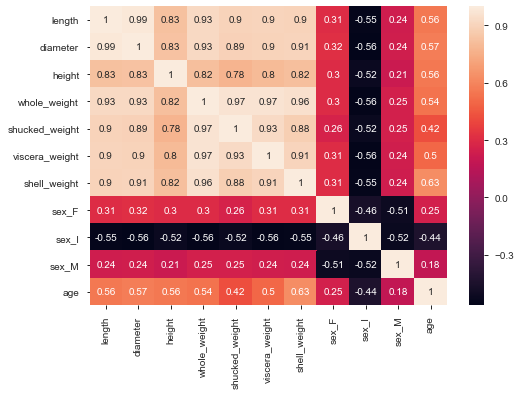

In [71]:
sns.heatmap(df1.corr(),annot = True)
plt.show()

In [69]:
df1.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'sex_F', 'sex_I', 'sex_M', 'age'],
      dtype='object')

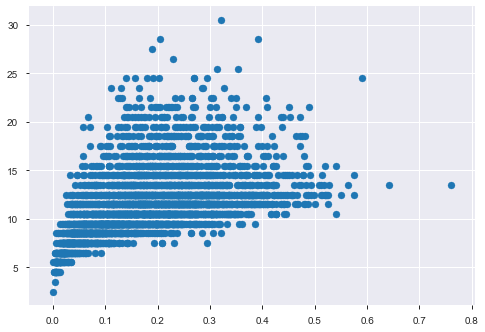

In [74]:
plt.scatter(x = df1['viscera_weight'], y = df1['age'])
plt.grid(True)

In [78]:
df1.drop(df1[(df1['viscera_weight'] > 0.5) &
          (df1['age'] < 20)].index, inplace = True)
df1.drop(df1[(df1['viscera_weight']<0.5) & (
df1['age'] > 25)].index, inplace = True)

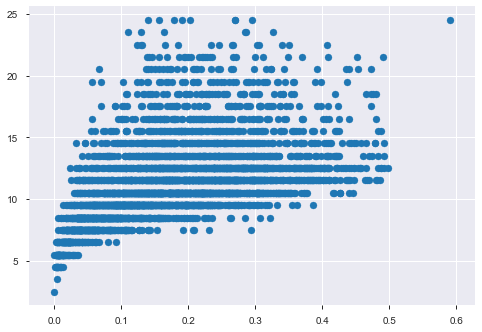

In [79]:
plt.scatter(x = df1['viscera_weight'], y = df1['age'])
plt.grid(True)

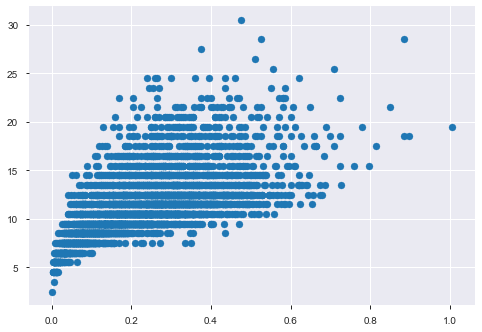

In [75]:
plt.scatter(x = df1['shell_weight'], y = df1['age'])
plt.grid(True)

In [81]:
df1.drop(df1[(df1['shell_weight'] > 0.6) &
          (df1['age'] < 25)].index, inplace = True)
df1.drop(df1[(df1['shell_weight']<0.8) & (
df1['age'] > 25)].index, inplace = True)

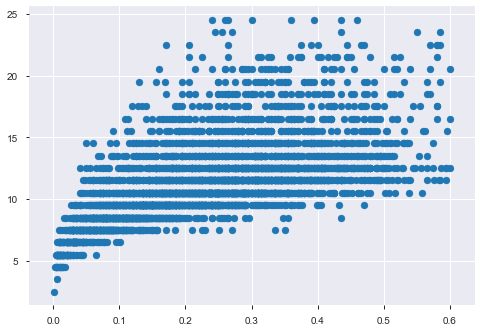

In [82]:
plt.scatter(x = df1['shell_weight'], y = df1['age'])
plt.grid(True)

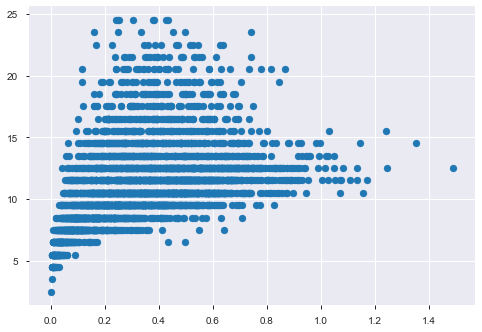

In [83]:
plt.scatter(x = df1['shucked_weight'], y = df1['age'])
plt.grid(True)

In [85]:
df1.drop(df1[(df1['viscera_weight'] >= 1) &
          (df1['age'] < 20)].index, inplace = True)
df1.drop(df1[(df1['viscera_weight']<1) & (
df1['age'] > 20)].index, inplace = True)

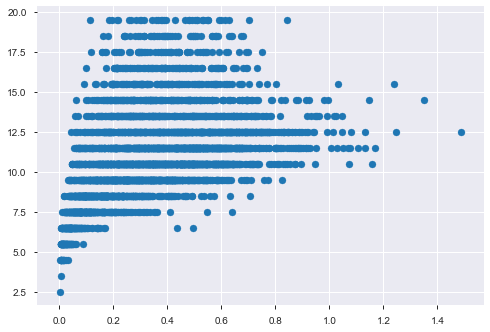

In [86]:
plt.scatter(x = df1['shucked_weight'], y = df1['age'])
plt.grid(True)

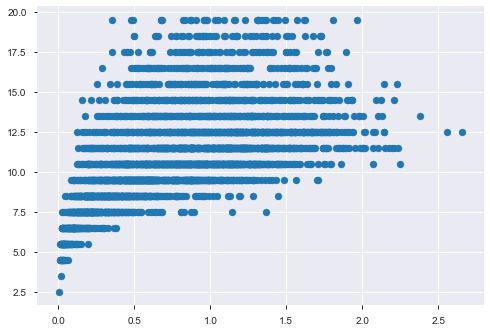

In [90]:
plt.scatter(x = df1['whole_weight'], y = df1['age'])
plt.grid(True)

In [94]:
df1.drop(df1[(df1['whole_weight'] >= 2.5) &
          (df1['age'] < 25)].index, inplace = True)
df1.drop(df1[(df1['whole_weight']<2.5) & (
df1['age'] > 25)].index, inplace = True)

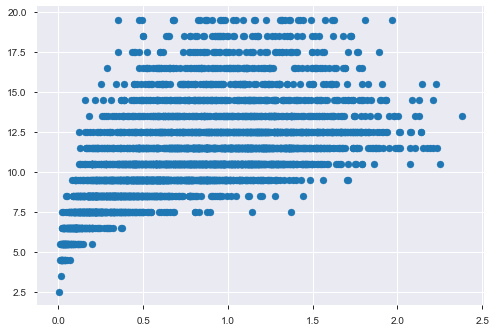

In [95]:
plt.scatter(x = df1['whole_weight'], y = df1['age'])
plt.grid(True)

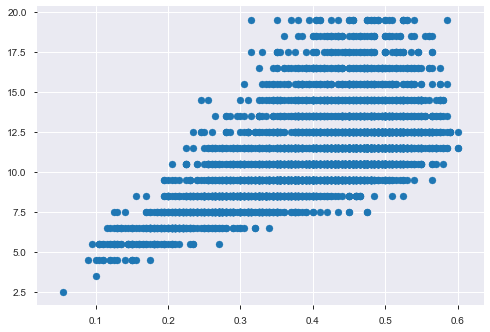

In [96]:
plt.scatter(x = df1['diameter'], y = df1['age'])
plt.grid(True)

In [98]:
df1.drop(df1[(df1['diameter'] <0.1) &
          (df1['age'] < 5)].index, inplace = True)
df1.drop(df1[(df1['diameter']<0.6) & (
df1['age'] > 25)].index, inplace = True)
df1.drop(df1[(df1['diameter']>=0.6) & (
df1['age'] < 25)].index, inplace = True)

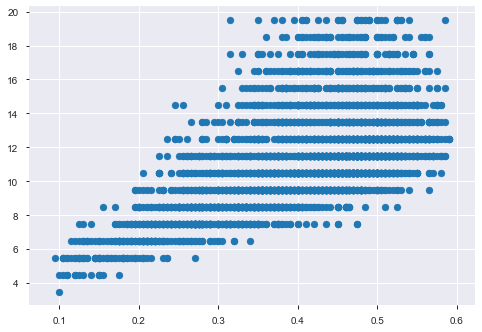

In [99]:
plt.scatter(x = df1['diameter'], y = df1['age'])
plt.grid(True)

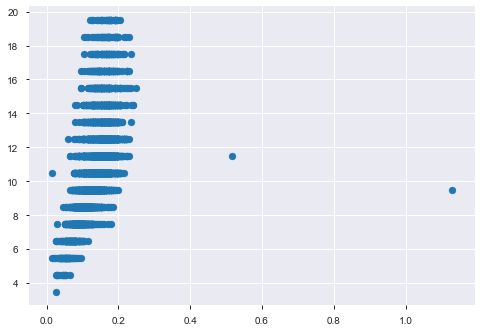

In [100]:
plt.scatter(x = df1['height'], y = df1['age'])
plt.grid(True)

In [101]:
df1.drop(df1[(df1['height'] > 0.4) &
          (df1['age'] < 15)].index, inplace = True)
df1.drop(df1[(df1['height']<0.4) & (
df1['age'] > 25)].index, inplace = True)

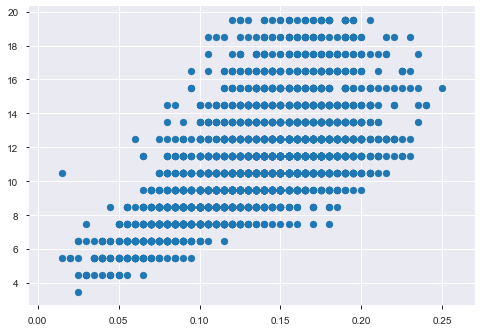

In [102]:
plt.scatter(x = df1['height'], y = df1['age'])
plt.grid(True)

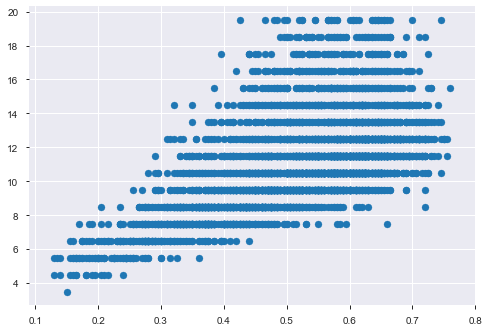

In [103]:
plt.scatter(x = df1['length'], y = df1['age'])
plt.grid(True)

In [105]:
df1.drop(df1[(df1['length'] <0.1) &
          (df1['age'] < 5)].index, inplace = True)
df1.drop(df1[(df1['length']<0.8) & (
df1['age'] > 25)].index, inplace = True)
df1.drop(df1[(df1['length']>=0.8) & (
df1['age'] < 25)].index, inplace = True)

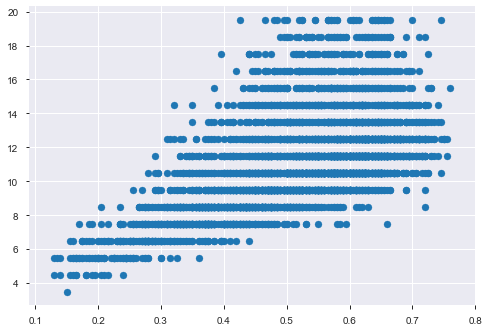

In [106]:
plt.scatter(x = df1['length'], y = df1['age'])
plt.grid(True)

# STANDARDIZATION

In [108]:
x=df1.drop('age',axis=1)
y=df1['age']

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [112]:
standardScale=StandardScaler()
standardScale.fit_transform(x)

selectkBest = SelectKBest()
x_new = selectkBest.fit_transform(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [113]:
from sklearn.linear_model import LinearRegression

In [126]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_train,y_train)

0.5403020254500619

In [116]:
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.543652
Mean Squared error of testing set :3.721860


In [128]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.54
R2 Score of testing set:0.50
